<a href="https://colab.research.google.com/github/devangi2000/Deep-Learning/blob/master/MLChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kaggle competitions download -c MLChallenge
! pip install -q kaggle
! pip install --upgrade pip
! pip install kaggle==1.5.6
! kaggle -v

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=fd6e11b99b38f292969ab60e679ff0cd7f4a9f33229819fe0b086c9fe9126eb4
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
 

In [ ]:
! kaggle competitions download -c MLChallenge

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devangipurkayastha","key":"bdb0ebf7aa7c190b7190cab0cc66c4d7"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            355         35  1.0              
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           2114         78  1.0              
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           1226         67  1.0              
balraj98/stanford-background-dataset         

In [ ]:
! kaggle competitions download -c MLChallenge

  0% 0.00/9.72M [00:00<?, ?B/s]
100% 9.72M/9.72M [00:00<00:00, 131MB/s]


In [ ]:
ls

kaggle.json  MLChallenge.zip  sample_data/


In [ ]:
! unzip MLChallenge

Archive:  MLChallenge.zip
  inflating: ML/Test/100.jpg         
  inflating: ML/Test/101.jpg         
  inflating: ML/Test/102.jpg         
  inflating: ML/Test/103.jpg         
  inflating: ML/Test/104.jpg         
  inflating: ML/Test/105.jpg         
  inflating: ML/Test/106.jpg         
  inflating: ML/Test/107.jpg         
  inflating: ML/Test/108.jpg         
  inflating: ML/Test/109.jpg         
  inflating: ML/Test/110.jpg         
  inflating: ML/Test/1141.jpg        
  inflating: ML/Test/1142.jpg        
  inflating: ML/Test/1143.jpg        
  inflating: ML/Test/1144.jpg        
  inflating: ML/Test/1145.jpg        
  inflating: ML/Test/1146.jpg        
  inflating: ML/Test/1147.jpg        
  inflating: ML/Test/1148.jpg        
  inflating: ML/Test/1149.jpg        
  inflating: ML/Test/1150.jpg        
  inflating: ML/Test/1151.jpg        
  inflating: ML/Test/1152.jpg        
  inflating: ML/Test/1153.jpg        
  inflating: ML/Test/1154.jpg        
  inflating: ML/Test/115

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os
import cv2
path = os.listdir('ML/Train/Bakery/')
x = cv2.imread('/content/ML/Train/Bakery/8.jpg')
print(len(path))
print(x.shape)

42
(100, 100, 3)


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = 'ML/Train'
valid_path = 'ML/Test'


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# get number of classes
folders = glob(train_path+'/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('ML/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('ML/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [103]:
r = model.fit(
  training_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set), verbose=1
)

Epoch 1/15
35/35 [==============================] - 19s 548ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 2/15
35/35 [==============================] - 18s 523ms/step - loss: 0.0108 - accuracy: 0.9991
Epoch 3/15
35/35 [==============================] - 20s 559ms/step - loss: 0.0081 - accuracy: 0.9982
Epoch 4/15
35/35 [==============================] - 17s 472ms/step - loss: 0.0104 - accuracy: 0.9982
Epoch 5/15
35/35 [==============================] - 20s 564ms/step - loss: 0.0094 - accuracy: 0.9982
Epoch 6/15
35/35 [==============================] - 21s 603ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 7/15
35/35 [==============================] - 20s 575ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/15
35/35 [==============================] - 19s 533ms/step - loss: 0.0166 - accuracy: 0.9982
Epoch 9/15
35/35 [==============================] - 20s 560ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 10/15
35/35 [==============================] - 17s 497ms/step - loss: 0.0130 - accura

In [104]:
r.history

{'accuracy': [0.9990966320037842,
  0.9990966320037842,
  0.9981933236122131,
  0.9981933236122131,
  0.9981933236122131,
  0.9990966320037842,
  1.0,
  0.9981933236122131,
  1.0,
  0.9990966320037842,
  0.9972899556159973,
  0.9963866472244263,
  0.9972899556159973,
  1.0,
  0.9990966320037842],
 'loss': [0.003738734172657132,
  0.010807816870510578,
  0.008071149699389935,
  0.010434127412736416,
  0.009392466396093369,
  0.004595017991960049,
  0.0027954373508691788,
  0.016608787700533867,
  0.002984919585287571,
  0.012988708913326263,
  0.012800916098058224,
  0.022039927542209625,
  0.012051636353135109,
  0.002789441728964448,
  0.005147195886820555]}

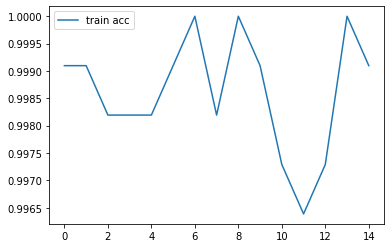

In [105]:
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()

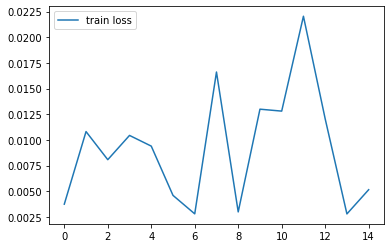

In [106]:
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()

In [107]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [108]:
model.save_weights('model1.h5')

In [133]:
import glob
files = glob.glob('/content/ML/Test/*')
preds = []
for img in files:
    img_pred = image.load_img(img, target_size=[224,224])
    img_pred = image.img_to_array(img_pred)
    img_pred = np.expand_dims(img_pred, axis=0)
    res = model.predict(img_pred)
    y=np.argmax(res, axis=1)
    preds.append(y.tolist()[0])
preds

[13,
 6,
 15,
 8,
 13,
 1,
 15,
 8,
 8,
 13,
 15,
 8,
 8,
 13,
 13,
 2,
 15,
 17,
 1,
 13,
 15,
 13,
 1,
 8,
 17,
 0,
 13,
 8,
 13,
 8,
 13,
 6,
 13,
 17,
 8,
 17,
 10,
 1,
 16,
 4,
 8,
 8,
 8,
 2,
 8,
 17,
 13,
 8,
 8,
 1,
 11,
 1,
 8,
 15,
 8,
 13,
 8,
 13,
 11,
 8,
 18,
 3,
 13,
 13,
 4,
 14,
 13,
 16,
 13,
 17,
 8,
 17,
 6,
 13,
 13,
 1,
 8,
 8,
 4,
 18,
 3,
 13,
 5,
 13,
 10,
 5,
 8,
 13,
 13,
 8,
 13,
 13,
 13,
 8,
 18,
 8,
 1,
 8,
 0,
 17,
 16,
 5,
 1,
 11,
 15,
 8,
 6,
 8,
 4,
 8,
 1,
 13,
 1,
 9,
 8,
 13,
 7,
 0,
 8,
 8,
 1,
 13,
 8,
 8,
 13,
 8,
 12,
 8,
 3,
 8,
 1,
 8,
 15,
 10,
 8,
 17,
 10,
 13,
 8,
 9,
 13,
 8,
 1,
 8,
 16,
 1,
 1,
 9,
 10,
 13,
 8,
 6,
 6,
 13,
 8,
 1,
 16,
 15,
 8,
 8,
 7,
 8,
 11,
 12,
 8,
 2,
 10,
 8,
 8,
 13,
 8,
 8,
 8,
 1,
 14,
 16,
 13,
 4,
 8,
 14,
 2,
 14,
 8,
 8,
 11,
 14,
 11,
 8,
 13,
 14,
 8,
 13,
 9,
 1,
 14,
 7,
 8,
 8,
 8,
 16,
 13,
 13,
 13,
 11,
 8,
 14,
 8,
 14,
 1,
 13,
 8,
 1,
 13,
 4,
 8,
 1,
 13,
 8,
 8,
 8,
 8,
 8,
 12,
 1,
 2,
 7

In [119]:
labels = training_set.class_indices
labels

{'Bakery': 0,
 'Battery': 1,
 'Cleanser': 2,
 'Confectional products': 3,
 'Dairy Products': 4,
 'Frozen Food': 5,
 'Fruits': 6,
 'Ice Cream': 7,
 'Instant': 8,
 'Personal care': 9,
 'Poultry products': 10,
 'Snacks': 11,
 'beverages': 12,
 'canned': 13,
 'care': 14,
 'cereals': 15,
 'chips': 16,
 'chocolates': 17,
 'vegetables': 18}

In [137]:
labels = dict((k,v) for v,k in labels.items())
labels


{0: 'Bakery',
 1: 'Battery',
 2: 'Cleanser',
 3: 'Confectional products',
 4: 'Dairy Products',
 5: 'Frozen Food',
 6: 'Fruits',
 7: 'Ice Cream',
 8: 'Instant',
 9: 'Personal care',
 10: 'Poultry products',
 11: 'Snacks',
 12: 'beverages',
 13: 'canned',
 14: 'care',
 15: 'cereals',
 16: 'chips',
 17: 'chocolates',
 18: 'vegetables'}

In [138]:
predictions = [labels[k] for k in preds]

In [139]:
#test_set.reset()
print(predictions)

['canned', 'Fruits', 'cereals', 'Instant', 'canned', 'Battery', 'cereals', 'Instant', 'Instant', 'canned', 'cereals', 'Instant', 'Instant', 'canned', 'canned', 'Cleanser', 'cereals', 'chocolates', 'Battery', 'canned', 'cereals', 'canned', 'Battery', 'Instant', 'chocolates', 'Bakery', 'canned', 'Instant', 'canned', 'Instant', 'canned', 'Fruits', 'canned', 'chocolates', 'Instant', 'chocolates', 'Poultry products', 'Battery', 'chips', 'Dairy Products', 'Instant', 'Instant', 'Instant', 'Cleanser', 'Instant', 'chocolates', 'canned', 'Instant', 'Instant', 'Battery', 'Snacks', 'Battery', 'Instant', 'cereals', 'Instant', 'canned', 'Instant', 'canned', 'Snacks', 'Instant', 'vegetables', 'Confectional products', 'canned', 'canned', 'Dairy Products', 'care', 'canned', 'chips', 'canned', 'chocolates', 'Instant', 'chocolates', 'Fruits', 'canned', 'canned', 'Battery', 'Instant', 'Instant', 'Dairy Products', 'vegetables', 'Confectional products', 'canned', 'Frozen Food', 'canned', 'Poultry products',

In [142]:
import pandas as pd
filenames = [file.split('/')[-1] for file in files]
filenames

['531.jpg',
 '931.jpg',
 '584.jpg',
 '686.jpg',
 '543.jpg',
 '102.jpg',
 '582.jpg',
 '516.jpg',
 '335.jpg',
 '309.jpg',
 '585.jpg',
 '1151.jpg',
 '641.jpg',
 '145.jpg',
 '345.jpg',
 '755.jpg',
 '588.jpg',
 '974.jpg',
 '46.jpg',
 '316.jpg',
 '586.jpg',
 '789.jpg',
 '143.jpg',
 '898.jpg',
 '690.jpg',
 '42.jpg',
 '1157.jpg',
 '1179.jpg',
 '895.jpg',
 '1311.jpg',
 '332.jpg',
 '1264.jpg',
 '323.jpg',
 '695.jpg',
 '1368.jpg',
 '691.jpg',
 '1262.jpg',
 '525.jpg',
 '638.jpg',
 '832.jpg',
 '1373.jpg',
 '1141.jpg',
 '1156.jpg',
 '745.jpg',
 '1314.jpg',
 '694.jpg',
 '1160.jpg',
 '334.jpg',
 '523.jpg',
 '513.jpg',
 '979.jpg',
 '540.jpg',
 '1177.jpg',
 '43.jpg',
 '1173.jpg',
 '328.jpg',
 '47.jpg',
 '313.jpg',
 '891.jpg',
 '756.jpg',
 '1371.jpg',
 '785.jpg',
 '1176.jpg',
 '329.jpg',
 '1225.jpg',
 '537.jpg',
 '1144.jpg',
 '637.jpg',
 '791.jpg',
 '893.jpg',
 '1155.jpg',
 '692.jpg',
 '929.jpg',
 '1221.jpg',
 '1142.jpg',
 '1220.jpg',
 '836.jpg',
 '748.jpg',
 '1268.jpg',
 '1375.jpg',
 '786.jpg',
 '837.jp

In [143]:

results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [144]:
results

,Filename,Predictions
0,531.jpg,canned
1,931.jpg,Fruits
2,584.jpg,cereals
3,686.jpg,Instant
4,543.jpg,canned
...,...,...
266,932.jpg,Fruits
267,693.jpg,chocolates
268,517.jpg,Instant
269,52.jpg,Bakery
